# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [2]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [3]:
df = pd.read_csv("./lab12_files/US_Baby_Names_right.csv")
display(df.head())

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [4]:
baby_names = df
# display(baby_names.head())
records_num = len(baby_names)
columns_types = baby_names.dtypes
print("> number of records: \n", records_num)
print("> columns types: \n", columns_types)

> number of records: 
 1016395
> columns types: 
 Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [5]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [6]:
baby_names = baby_names.drop(columns=['Unnamed: 0', 'Id'])
baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [7]:
print(baby_names['Gender'].unique())
print("num of women: ", len(baby_names[baby_names['Gender'] == "M"]))
print("num of men: ", len(baby_names[baby_names['Gender'] == "F"]))

['F' 'M']
num of women:  457549
num of men:  558846


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [8]:
grouped = baby_names.groupby('Name')
grouped.count().Count.nlargest(10)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Angel      962
Name: Count, dtype: int64

In [30]:
top_names = baby_names.Name.value_counts().nlargest(10)

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

In [15]:
womens_top_names = baby_names[baby_names['Gender'] == "F"].Name.value_counts().nlargest(10)
mens_top_names = baby_names[baby_names['Gender'] == "M"].Name.value_counts().nlargest(10)

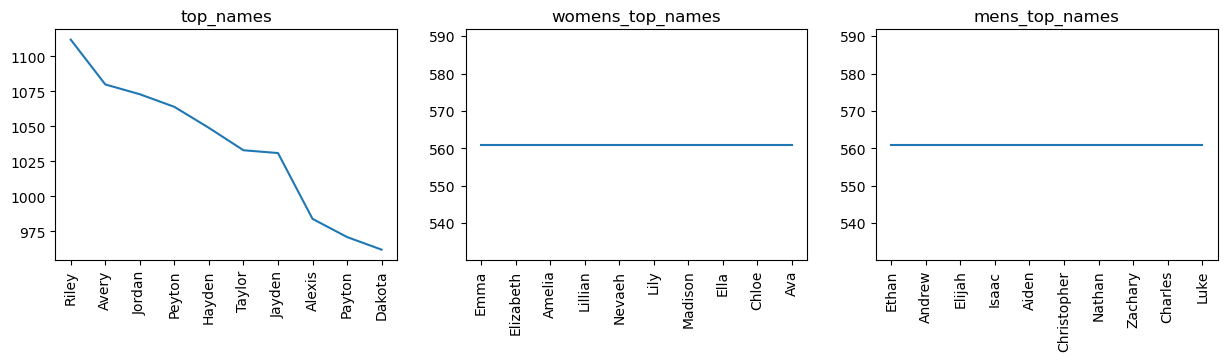

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(15,3))
axs[0].plot(top_names)
axs[0].set_title('top_names')
axs[1].plot(womens_top_names)
axs[1].set_title('womens_top_names')
axs[2].plot(mens_top_names)
axs[2].set_title('mens_top_names')
for ax in axs:
    ax.tick_params(axis='x', labelrotation=90)
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [62]:
print("number of names: ", len(baby_names['Name'].unique()))

number of names:  17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [66]:
import random

def name_generator_from_dataframe(dataframe):
    name_probabilities = []
    
    for name, probability in dataframe.iterrows():
        name_probabilities.extend([name] * probability.values[0])
    
    while True:
        yield random.choice(name_probabilities)

# Example usage:
# Assuming your DataFrame looks like this:
# df = pd.DataFrame({'Probability': [100, 80, 120]}, index=['Adam', 'Ewa', 'Jan'])

generator = name_generator_from_dataframe(top_names)

# Generating names:
for _ in range(10):
    print(next(generator))

Jayden
Jordan
Avery
Avery
Hayden
Avery
Dakota
Riley
Alexis
Peyton


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [64]:
print(baby_names.Name.value_counts().nlargest(1))
top_names.describe()

Riley    1112
Name: Name, dtype: int64


,Name
count,10.00000
mean,1035.90000
std,49.96988
min,962.00000
25%,995.75000
50%,1041.00000
75%,1070.75000
max,1112.00000


## Część II

In [1]:
import pandas as pd

Krok 1: Wczytaj dane

In [3]:
df = pd.read_csv("./lab12_files/ocupation.csv", sep='|')
display(df.head())

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Krok 2: Podejrzyj pierwsze 25 rekordów

In [5]:
display(df.head(25))

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [6]:
display(df.tail(10))

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [13]:
num_of_records, num_of_columns = df.shape
print("number of observables: ", num_of_records)
print("number of columns: ", num_of_columns)

number of observables:  943
number of columns:  5


Krok 5: Wypisz nazwy kolumn

In [16]:
print(list(df.columns))

['user_id', 'age', 'gender', 'occupation', 'zip_code']


Krok 6: Ile różnych zawodów jest w zbiorze?

In [29]:
occupation_list = list(df.occupation.unique())
occupation_list.remove("none")
occupation_list.remove("other")
occupation_list
print("number of unique specified occupations: ", len(occupation_list))

number of unique specified occupations:  19


Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

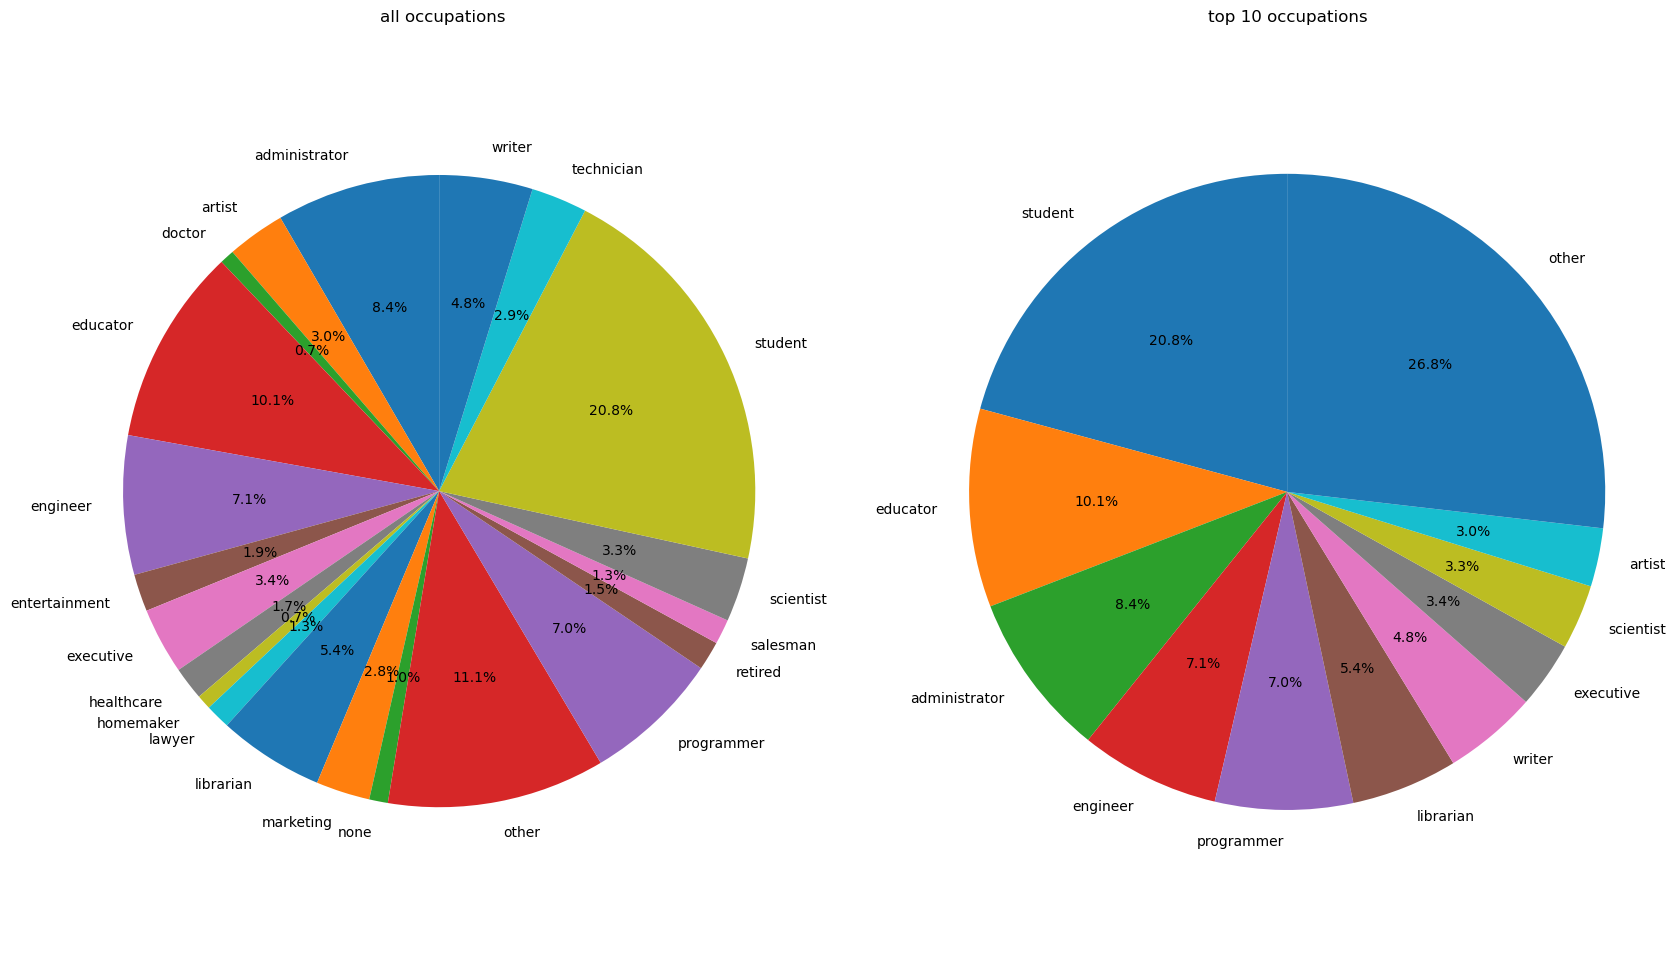

In [147]:
import matplotlib.pyplot as plt
import matplotlib

grouped = df.groupby(['occupation'], as_index=False).count().rename(columns={"user_id":"frequency"})[['occupation', 'frequency']]

top10 = grouped.drop(grouped.index[grouped['occupation'] == 'other'].tolist()).sort_values('frequency', ascending=False).head(10)
other = pd.DataFrame(data = {
    'occupation' : ['other'],
    'frequency' : [grouped.drop(top10.index.tolist()).frequency.sum()]
})
top10 = pd.concat([top10, other], ignore_index = True)

fig, ax = plt.subplots(1,2, figsize=(20,12))
ax[0].pie(list(grouped['frequency']), labels=list(grouped['occupation']), autopct='%1.1f%%', startangle=90)
ax[0].axis('equal')

ax[1].pie(list(top10['frequency']), labels=list(top10['occupation']), autopct='%1.1f%%', startangle=90)
ax[1].axis('equal')

ax[0].set_title('all occupations')
ax[1].set_title('top 10 occupations')

plt.show()


Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

In [164]:
import numpy as np
grouped = df.groupby(['occupation'], as_index=False).count().rename(columns={"user_id":"frequency"})[['occupation', 'frequency']]
top10 = grouped.drop(grouped.index[grouped['occupation'] == 'other'].tolist()).sort_values('frequency', ascending=False).head(10)
top10_data = df[df.occupation.isin(top10.occupation.tolist())][['occupation', 'gender']]
top10_data['count'] = np.zeros(len(top10_data))
top10_data_grouped = top10_data.groupby(['occupation', 'gender'], as_index=False)
top10_data_grouped = top10_data_grouped.count()
top10_by_gender = top10_data_grouped.pivot(index='occupation', columns='gender', values='count')
top10_by_gender

gender,F,M
occupation,,
administrator,36,43
artist,13,15
educator,26,69
engineer,2,65
executive,3,29
librarian,29,22
programmer,6,60
scientist,3,28
student,60,136


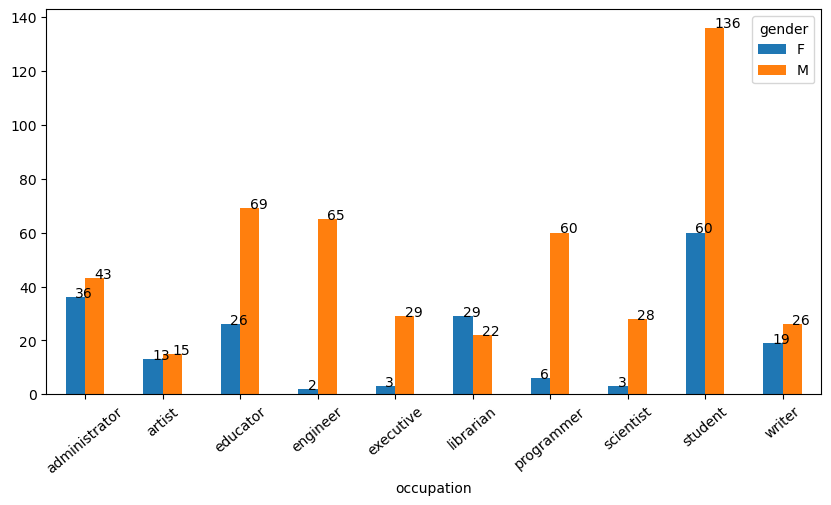

In [172]:
fig, ax = plt.subplots(figsize=(10,5))
top10_by_gender.plot.bar(rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

In [192]:
grouped = df.groupby(['occupation'], as_index=False).count().rename(columns={"user_id":"frequency"})[['occupation', 'frequency']]
top10 = grouped.drop(grouped.index[grouped['occupation'] == 'other'].tolist()).sort_values('frequency', ascending=False).head(10)

mean_age_for_occupations = df.groupby(['occupation'], as_index=False)['age'].mean().rename(columns={"age":"mean_age"})
mean_age_for_top10_occupations = mean_age_for_occupations[mean_age_for_occupations.occupation.isin(top10.occupation.tolist())].set_index('occupation')
mean_age_for_top10_occupations

,mean_age
occupation,
administrator,38.746835
artist,31.392857
educator,42.010526
engineer,36.388060
executive,38.718750
librarian,40.000000
programmer,33.121212
scientist,35.548387
student,22.081633


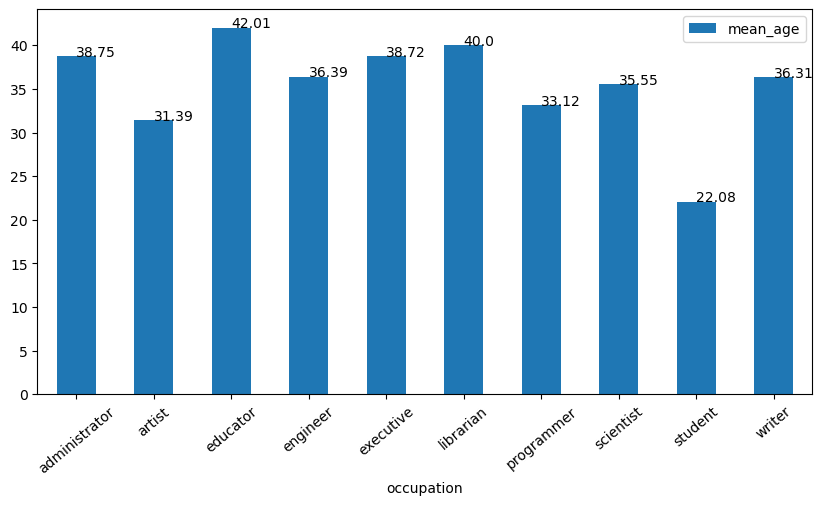

In [193]:
fig, ax = plt.subplots(figsize=(10,5))
mean_age_for_top10_occupations.plot.bar(rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

In [198]:
grouped = df.groupby(['occupation'], as_index=False).count().rename(columns={"user_id":"frequency"})[['occupation', 'frequency']]
top10 = grouped.drop(grouped.index[grouped['occupation'] == 'other'].tolist()).sort_values('frequency', ascending=False).head(10)

mean_age_for_occupations = df.groupby(['occupation', 'gender'], as_index=False)['age'].mean().rename(columns={"age":"mean_age"})
mean_age_for_top10_occupations = mean_age_for_occupations[mean_age_for_occupations.occupation.isin(top10.occupation.tolist())]
mean_age_for_top10_occupations = mean_age_for_top10_occupations.pivot(index='occupation', columns='gender', values='mean_age')
mean_age_for_top10_occupations

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
educator,39.115385,43.101449
engineer,29.500000,36.600000
executive,44.000000,38.172414
librarian,40.000000,40.000000
programmer,32.166667,33.216667
scientist,28.333333,36.321429
student,20.750000,22.669118


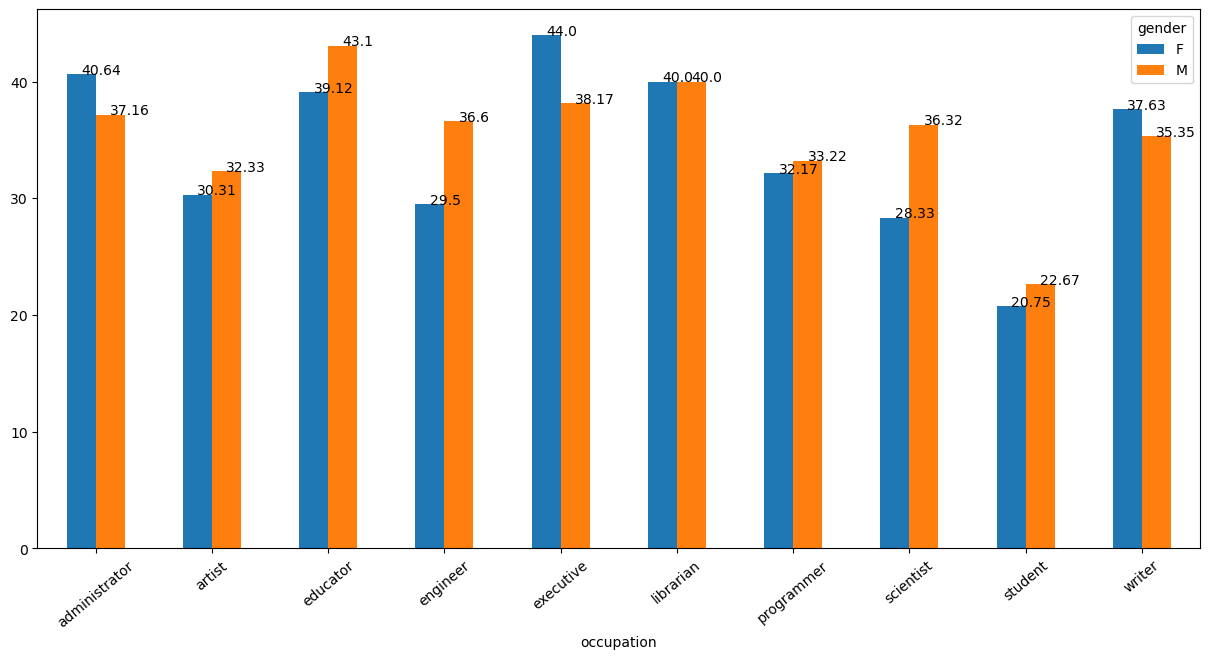

In [202]:
fig, ax = plt.subplots(figsize=(15,7))
mean_age_for_top10_occupations.plot.bar(rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.show()